# Task-2

## Model Building and Training

In [1]:
# ================================
# LOADING THE DATASET
# ================================
import pandas as pd
df_fraud = pd.read_csv('../data/processed/fraud_final.csv') 

# Drop unwanted timestamp columns if present and overwrite the CSV
cols_to_drop = ['purchase_time', 'signup_time']
existing = [c for c in cols_to_drop if c in df_fraud.columns]
if existing:
    print('Dropping columns:', existing)
    df_fraud = df_fraud.drop(columns=existing)
    df_fraud.to_csv('../data/processed/fraud_final.csv', index=False)
else:
    print('No columns to drop:', cols_to_drop)

No columns to drop: ['purchase_time', 'signup_time']


In [8]:
import sys
import os

# Add project root to sys.path
sys.path.append(os.path.abspath(os.path.join("..")))

from src.split import stratified_split
from src.baseline_model import logistic_regression_model
from src.ensemble_model import random_forest_model
from src.training_pipeline import train_and_evaluate

# ================================
# LOADING THE DATASET
# ================================
import pandas as pd
df_fraud = pd.read_csv('../data/processed/fraud_final.csv') 

 
# ==============================
# 1. Train-test split
# ==============================
X_train, X_test, y_train, y_test = stratified_split(
    df_fraud, target="class"
)

# ==============================
# 2. Baseline Model
# ==============================
lr = logistic_regression_model()
_, lr_metrics = train_and_evaluate(
    X_train, y_train, X_test, y_test, lr
)

print("Logistic Regression Results")
print(lr_metrics)

# ==============================
# 3. Ensemble Model
# ==============================
rf = random_forest_model()
_, rf_metrics = train_and_evaluate(
    X_train, y_train, X_test, y_test, rf
)

print("\nRandom Forest Results")
print(rf_metrics)

Logistic Regression Results
{'F1': 0.2783661119515885, 'PR_AUC': 0.46695919523611956, 'Confusion_Matrix': array([[15019,  8357],
       [  706,  1748]])}

Random Forest Results
{'F1': 0.6404347011429642, 'PR_AUC': 0.7225801172970531, 'Confusion_Matrix': array([[22202,  1174],
       [  745,  1709]])}


In [2]:
import sys
import os
import pandas as pd

# Add project root to sys.path
sys.path.append(os.path.abspath(os.path.join("..")))
print("sys.path:", sys.path[-1])

from src.preprocessing import preprocess_fraud, preprocess_creditcard
from src.split import stratified_split
from src.baseline_model import logistic_regression_model
from src.ensemble_model import random_forest_model
from src.training_pipeline import train_and_evaluate

# ==============================
# 1. Load dataset
# ==============================
df_fraud = pd.read_csv('../data/processed/fraud_final.csv')
df_cc = pd.read_csv('../data/processed/creditcard_clean.csv')

# ==============================
# 2. Preprocess
# ==============================
df_fraud = preprocess_fraud(df_fraud)
df_cc = preprocess_creditcard(df_cc)

# ==============================
# 3. Train-test split
# ==============================
X_train_f, X_test_f, y_train_f, y_test_f = stratified_split(df_fraud, target="class")
X_train_c, X_test_c, y_train_c, y_test_c = stratified_split(df_cc, target="Class")

# ==============================
# 4. Train models on df_fraud
# ==============================
lr = logistic_regression_model()
_, lr_metrics_f = train_and_evaluate(X_train_f, y_train_f, X_test_f, y_test_f, lr)

rf = random_forest_model()
_, rf_metrics_f = train_and_evaluate(X_train_f, y_train_f, X_test_f, y_test_f, rf)

# ==============================
# 5. Train models on df_cc
# ==============================
lr_cc = logistic_regression_model()
_, lr_metrics_c = train_and_evaluate(X_train_c, y_train_c, X_test_c, y_test_c, lr_cc)

rf_cc = random_forest_model()
_, rf_metrics_c = train_and_evaluate(X_train_c, y_train_c, X_test_c, y_test_c, rf_cc)

# ==============================
# 6. Compare results
# ==============================
print("Fraud Data - Logistic Regression:", lr_metrics_f)
print("Fraud Data - Random Forest:", rf_metrics_f)
print("\nCreditCard Data - Logistic Regression:", lr_metrics_c)
print("CreditCard Data - Random Forest:", rf_metrics_c)

sys.path: c:\Users\hp\Desktop\python-projects\Detection-of-fraud-cases-for-E-commerce
in preprocess_fraud, columns: ['user_id', 'purchase_value', 'age', 'ip_address', 'class', 'ip_int', 'lower_bound_ip_address', 'upper_bound_ip_address', 'hour_of_day', 'day_of_week', 'time_since_signup', 'user_tx_count', 'time_since_last_tx', 'tx_1h', 'tx_24h', 'sex_M', 'browser_FireFox', 'browser_IE', 'browser_Opera', 'browser_Safari', 'source_Direct', 'source_SEO', 'device_id_freq', 'country_freq']
Fraud Data - Logistic Regression: {'F1': 0.2783661119515885, 'PR_AUC': 0.46695919523611956, 'Confusion_Matrix': array([[15019,  8357],
       [  706,  1748]])}
Fraud Data - Random Forest: {'F1': 0.6404347011429642, 'PR_AUC': 0.7225801172970531, 'Confusion_Matrix': array([[22202,  1174],
       [  745,  1709]])}

CreditCard Data - Logistic Regression: {'F1': 0.10546378653113088, 'PR_AUC': 0.7047562792276945, 'Confusion_Matrix': array([[55255,  1396],
       [   12,    83]])}
CreditCard Data - Random Forest:

## Graphical model comparison 

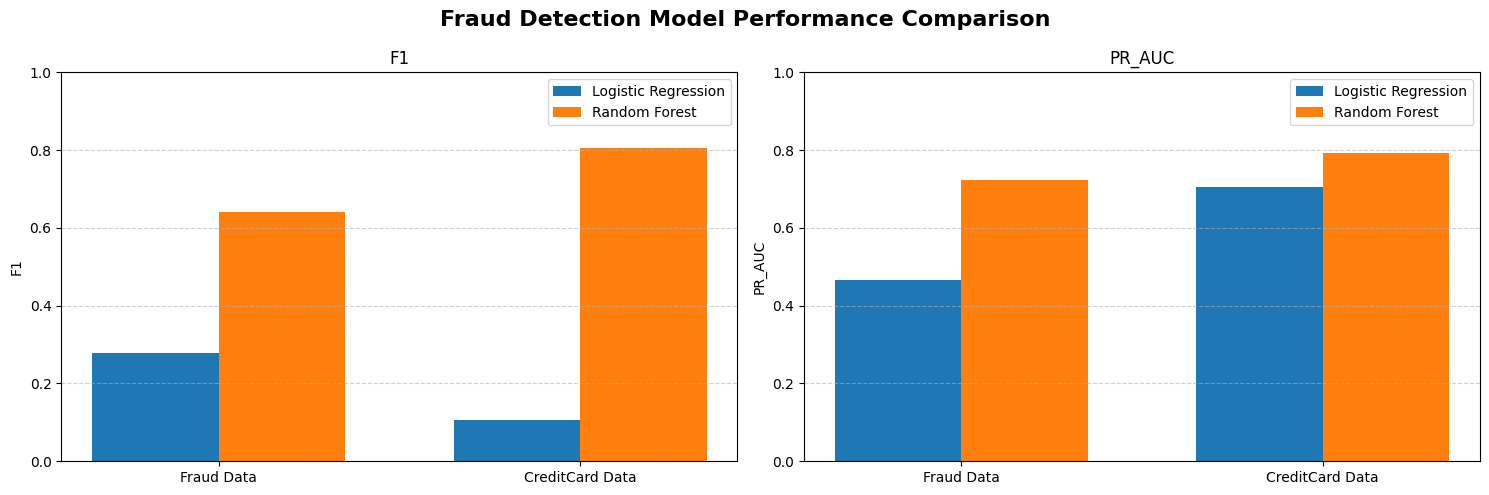

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ==============================
# 1. Collect results dynamically
# ==============================
results = pd.DataFrame([
    {
        "Dataset": "Fraud Data",
        "Model": "Logistic Regression",
        "F1": lr_metrics_f["F1"],
        "PR_AUC": lr_metrics_f["PR_AUC"]
    },
    {
        "Dataset": "Fraud Data",
        "Model": "Random Forest",
        "F1": rf_metrics_f["F1"],
        "PR_AUC": rf_metrics_f["PR_AUC"]
    },
    {
        "Dataset": "CreditCard Data",
        "Model": "Logistic Regression",
        "F1": lr_metrics_c["F1"],
        "PR_AUC": lr_metrics_c["PR_AUC"]
    },
    {
        "Dataset": "CreditCard Data",
        "Model": "Random Forest",
        "F1": rf_metrics_c["F1"],
        "PR_AUC": rf_metrics_c["PR_AUC"]
    }
])

# ==============================
# 2. Plot setup
# ==============================
metrics = ["F1", "PR_AUC"]
datasets = results["Dataset"].unique()
models = results["Model"].unique()

x = np.arange(len(datasets))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle("Fraud Detection Model Performance Comparison", fontsize=16, fontweight="bold")

# ==============================
# 3. Draw bar charts
# ==============================
for i, metric in enumerate(metrics):
    ax = axes[i]

    for j, model in enumerate(models):
        values = results[results["Model"] == model][metric].values
        ax.bar(
            x + j * width,
            values,
            width,
            label=model
        )

    ax.set_title(metric)
    ax.set_xticks(x + width / 2)
    ax.set_xticklabels(datasets)
    ax.set_ylim(0, 1)
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()
